# Getting Started

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
!gdown "1eKAsgrSnsPi4FIAR1vLITAnNDw6ae-yp"

Downloading...
From: https://drive.google.com/uc?id=1eKAsgrSnsPi4FIAR1vLITAnNDw6ae-yp
To: /content/COVIDiSTRESS_May_30_cleaned_final (1).csv
100% 90.3M/90.3M [00:01<00:00, 85.9MB/s]


In [ ]:
df = pd.read_csv('/content/COVIDiSTRESS_May_30_cleaned_final (1).csv',encoding='latin-1')

<ipython-input-3-08569bbeaf8f>:1: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/COVIDiSTRESS_May_30_cleaned_final (1).csv',encoding='latin-1')


In [ ]:
df.head()

,ID,answered_all,Duration..in.seconds.,RecordedDate,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,...,Final_open,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Scale_UCLA_TRI_avg
0,1,No,180,2020-05-30 23:47:17,SAR,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,...,NaN,2.900000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,No,3100,2020-05-29 23:30:15,UR,20,Male,"College degree, bachelor, master",None,Student,...,NaN,2.200000,2.333333,2.000000,5.000000,5.333333,5.0,5.000000,5.0,NaN
2,3,No,127,2020-05-30 22:40:15,SAR,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,No,1710,2020-05-29 22:47:17,BG,79,Male,"College degree, bachelor, master",College degree,Not employed,...,NaN,3.600000,4.000000,4.000000,4.666667,4.000000,5.0,5.000000,3.9,NaN
4,5,No,2239,2020-05-29 22:42:30,SAR,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,...,Informaciones no confiables,2.714286,1.000000,3.666667,4.666667,5.333333,5.0,4.666667,5.0,NaN


## Checking Duplicated Data

In [ ]:
'True' in df.duplicated().tolist()

False

## Check Data Shape

In [ ]:
df.shape

(125306, 154)

In [ ]:
df['Dem_employment_copy'] = df['Dem_employment']
df['Dem_gender_copy'] = df['Dem_gender']
df['Dem_maritalstatus_copy'] = df['Dem_maritalstatus']
df['Dem_isolation_copy'] = df['Dem_isolation']
df['Dem_edu_copy'] = df['Dem_edu']
df['Dem_edu_mom_copy'] = df['Dem_edu_mom']
df['Dem_riskgroup_copy'] = df['Dem_riskgroup']

In [ ]:
df.shape

(125306, 161)

In [ ]:
col_name = pd.DataFrame(df.columns,columns = ["Column Name"])
col_name

,Column Name
0,ID
1,answered_all
2,Duration..in.seconds.
3,RecordedDate
4,UserLanguage
...,...
156,Dem_maritalstatus_copy
157,Dem_isolation_copy
158,Dem_edu_copy
159,Dem_edu_mom_copy


In [ ]:
demography = [*df.columns[5:11],*df.columns[13:19],*df.columns[154:161]]

In [ ]:
demography

['Dem_age',
 'Dem_gender',
 'Dem_edu',
 'Dem_edu_mom',
 'Dem_employment',
 'Country',
 'Dem_maritalstatus',
 'Dem_dependents',
 'Dem_riskgroup',
 'Dem_isolation',
 'Dem_isolation_adults',
 'Dem_isolation_kids',
 'Dem_employment_copy',
 'Dem_gender_copy',
 'Dem_maritalstatus_copy',
 'Dem_isolation_copy',
 'Dem_edu_copy',
 'Dem_edu_mom_copy',
 'Dem_riskgroup_copy']

## Checking Missing Values

In [ ]:
column_name = df.columns

data_count = []
for col in column_name:
  data_count.append(df[col].count())

missing_values = []
for col in column_name:
  missing_values.append(df[col].isnull().sum())

percentage_missing_values = []
for col in column_name:
  percentage_missing_values.append(round(df[col].isnull().sum() / df.shape[0],4)*100)

data_type = []
for col in column_name:
  data_type.append(df[col].dtype)

df_info = pd.DataFrame(list(zip(column_name,data_count,missing_values,percentage_missing_values,data_type)),
                       columns =['Column Name', 'Count','Missing Values','Percentage Missing Values','Data Type'])
df_info

,Column Name,Count,Missing Values,Percentage Missing Values,Data Type
0,ID,125306,0,0.00,int64
1,answered_all,125306,0,0.00,object
2,Duration..in.seconds.,125306,0,0.00,int64
3,RecordedDate,125306,0,0.00,object
4,UserLanguage,125306,0,0.00,object
...,...,...,...,...,...
156,Dem_maritalstatus_copy,124291,1015,0.81,object
157,Dem_isolation_copy,123523,1783,1.42,object
158,Dem_edu_copy,124467,839,0.67,object
159,Dem_edu_mom_copy,123163,2143,1.71,object


### Handling Missing Values

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print("Missing value : %s" % df[col].isnull().sum())
  print("")

ID
1         1
83548     1
83546     1
83545     1
83544     1
         ..
41765     1
41764     1
41763     1
41762     1
125306    1
Name: ID, Length: 125306, dtype: int64
Missing value : 0

answered_all
No     72075
Yes    53231
Name: answered_all, dtype: int64
Missing value : 0

Duration..in.seconds.
866      139
924      139
871      138
830      137
895      133
        ... 
67579      1
3362       1
4895       1
78836      1
4730       1
Name: Duration..in.seconds., Length: 9294, dtype: int64
Missing value : 0

RecordedDate
2020-03-31 13:32:22    5
2020-04-01 06:07:35    4
2020-04-03 04:39:55    4
2020-04-01 11:48:15    4
2020-04-07 17:17:21    4
                      ..
2020-04-07 02:44:51    1
2020-04-07 02:39:25    1
2020-04-08 02:35:45    1
2020-04-07 02:40:38    1
2020-03-26 11:00:34    1
Name: RecordedDate, Length: 118604, dtype: int64
Missing value : 0

UserLanguage
FI       22420
FR       14464
DA       10670
SME      10318
LT        8774
EN        7637
SAR       5950
BG

#### Melihat lebih lanjut isi dari Dem_state

In [ ]:
df_state = pd.DataFrame(df['Dem_state'].value_counts())
df_state

,Dem_state
Uusimaa,6958
Varsinais-Suomi,2412
Vilnius,2324
Pirkanmaa,1622
Veracruz,1523
...,...
"FBiH, SBK",1
Lithuania Siauliai,1
Mostar,1
Ile-de-FRANCE,1


#### Handling missing values pada kolom-kolom demography dan Trust_countrymeasure

In [ ]:
for col in demography:
  print(col)
  print(df[col].value_counts())
  print("Missing value : %s" % df[col].isnull().sum())
  print("")

Dem_age
30     3761
29     3602
25     3571
27     3511
28     3474
       ... 
101       1
99        1
93        1
100       1
95        1
Name: Dem_age, Length: 86, dtype: int64
Missing value : 0

Dem_gender
Female                        90400
Male                          33126
Other/would rather not say     1474
Name: Dem_gender, dtype: int64
Missing value : 306

Dem_edu
College degree, bachelor, master                          65527
Some College, short continuing education or equivalent    28309
Up to 12 years of school                                  13633
PhD/Doctorate                                             11491
Up to 6 years of school                                    2024
Up to 9 years of school                                    1959
None                                                       1505
Uninformative response                                       19
Name: Dem_edu, dtype: int64
Missing value : 839

Dem_edu_mom
College degree                34601
Up to 12 year

In [ ]:
df["Dem_gender"] = df["Dem_gender"].fillna("Other/would rather not say")
df["Dem_gender_copy"] = df["Dem_gender_copy"].fillna("Other/would rather not say")

# df["Dem_edu"] = df["Dem_edu"].fillna("None")
# df["Dem_edu"] = df["Dem_edu"].replace("Uninformative response","None")
# df["Dem_edu_copy"] = df["Dem_edu_copy"].fillna("None")
# df["Dem_edu_copy"] = df["Dem_edu_copy"].replace("Uninformative response","None")
df["Dem_edu"] = df["Dem_edu"].fillna("None")
df["Dem_edu"] = df["Dem_edu"].replace("None","Uninformative response")
df["Dem_edu_copy"] = df["Dem_edu_copy"].fillna("None")
df["Dem_edu_copy"] = df["Dem_edu_copy"].replace("None","Uninformative response")

# df["Dem_edu_mom"] = df["Dem_edu_mom"].fillna("None")
# df["Dem_edu_mom"] = df["Dem_edu_mom"].replace("Uninformative response","None")
# df["Dem_edu_mom_copy"] = df["Dem_edu_mom_copy"].fillna("None")
# df["Dem_edu_mom_copy"] = df["Dem_edu_mom_copy"].replace("Uninformative response","None")
df["Dem_edu_mom"] = df["Dem_edu_mom"].fillna("None")
df["Dem_edu_mom"] = df["Dem_edu_mom"].replace("None","Uninformative response")
df["Dem_edu_mom_copy"] = df["Dem_edu_mom_copy"].fillna("None")
df["Dem_edu_mom_copy"] = df["Dem_edu_mom_copy"].replace("None","Uninformative response")

df["Dem_employment"] = df["Dem_employment"].fillna("Other")
df["Dem_employment_copy"] = df["Dem_employment_copy"].fillna("Other")
#df["Dem_employment"] = df["Dem_employment"].fillna(df["Dem_employment"].mode()[0])
#df["Dem_employment_copy"] = df["Dem_employment_copy"].fillna(df["Dem_employment_copy"].mode()[0])

df["Country"] = df["Country"].fillna("Other")
df["Dem_isolation"] = df["Dem_isolation"].fillna("Other")
df["Dem_isolation"] = df["Dem_isolation"].replace("1","Other")
df["Dem_isolation_copy"] = df["Dem_isolation_copy"].fillna("Other")
df["Dem_isolation_copy"] = df["Dem_isolation_copy"].replace("1","Other")

df["Dem_dependents"] = df["Dem_dependents"].fillna(df["Dem_dependents"].median())
df["Dem_isolation_adults"] = df["Dem_isolation_adults"].fillna(df["Dem_isolation_adults"].median())
df["Dem_isolation_kids"] = df["Dem_isolation_kids"].fillna(df["Dem_isolation_adults"].median())
df["Dem_maritalstatus"] = df["Dem_maritalstatus"].fillna("Other or would rather not say")
df["Dem_maritalstatus"] = df["Dem_maritalstatus"].replace("Uninformative response","Other or would rather not say")
df["Dem_maritalstatus_copy"] = df["Dem_maritalstatus_copy"].fillna("Other or would rather not say")
df["Dem_maritalstatus_copy"] = df["Dem_maritalstatus_copy"].replace("Uninformative response","Other or would rather not say")
df["Dem_riskgroup"] = df["Dem_riskgroup"].fillna("Not sure")
df["Dem_riskgroup_copy"] = df["Dem_riskgroup_copy"].fillna("Not sure")
df["Trust_countrymeasure"] = df["Trust_countrymeasure"].fillna(df["Trust_countrymeasure"].mean())

## Data Encoding
Pada bagian ini, data-data yang bertipe kategorikal diubah menjadi numerikal

In [ ]:
df = pd.get_dummies(df, columns = ['Dem_employment','Dem_gender','Dem_maritalstatus','Dem_isolation'])
# df['Dem_edu'] = df['Dem_edu'].replace('None', 0)
# df['Dem_edu'] = df['Dem_edu'].replace('Up to 6 years of school', 1)
# df['Dem_edu'] = df['Dem_edu'].replace('Up to 9 years of school', 2)
# df['Dem_edu'] = df['Dem_edu'].replace('Up to 12 years of school', 3)
# df['Dem_edu'] = df['Dem_edu'].replace('Some College, short continuing education or equivalent', 4)
# df['Dem_edu'] = df['Dem_edu'].replace('College degree, bachelor, master', 5)
# df['Dem_edu'] = df['Dem_edu'].replace('PhD/Doctorate', 6)
df['Dem_edu'] = df['Dem_edu'].replace('Uninformative response', 0)
df['Dem_edu'] = df['Dem_edu'].replace('Up to 6 years of school', 1)
df['Dem_edu'] = df['Dem_edu'].replace('Up to 9 years of school', 2)
df['Dem_edu'] = df['Dem_edu'].replace('Up to 12 years of school', 3)
df['Dem_edu'] = df['Dem_edu'].replace('Some College, short continuing education or equivalent', 4)
df['Dem_edu'] = df['Dem_edu'].replace('College degree, bachelor, master', 5)
df['Dem_edu'] = df['Dem_edu'].replace('PhD/Doctorate', 6)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('None', 0)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Up to 6 years of school', 1)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Up to 9 years of school', 2)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Up to 12 years of school', 3)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Some College or equivalent', 4)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('College degree', 5)
# df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('PhD/Doctorate', 6)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Uninformative response', 0)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Up to 6 years of school', 1)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Up to 9 years of school', 2)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Up to 12 years of school', 3)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('Some College or equivalent', 4)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('College degree', 5)
df['Dem_edu_mom'] = df['Dem_edu_mom'].replace('PhD/Doctorate', 6)
# df['Dem_riskgroup'] = df['Dem_riskgroup'].replace('Yes', 2)
# df['Dem_riskgroup'] = df['Dem_riskgroup'].replace('No', 1)
# df['Dem_riskgroup'] = df['Dem_riskgroup'].replace('Not sure', 0)
df['Dem_riskgroup'] = df['Dem_riskgroup'].replace('Yes', 3)
df['Dem_riskgroup'] = df['Dem_riskgroup'].replace('No', 2)
df['Dem_riskgroup'] = df['Dem_riskgroup'].replace('Not sure', 1)

df['Dem_gender_copy'] = df['Dem_gender_copy'].replace('Other/would rather not say', 0)
df['Dem_gender_copy'] = df['Dem_gender_copy'].replace('Male', 1)
df['Dem_gender_copy'] = df['Dem_gender_copy'].replace('Female', 2)

df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Other', 0)
df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Student', 1)
df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Not employed', 2)
df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Retired', 3)
df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Part time employed', 4)
df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Self-employed', 5)
df['Dem_employment_copy'] = df['Dem_employment_copy'].replace('Full time employed', 6)

df['Dem_maritalstatus_copy'] = df['Dem_maritalstatus_copy'].replace('Other or would rather not say', 0)
df['Dem_maritalstatus_copy'] = df['Dem_maritalstatus_copy'].replace('Single', 1)
df['Dem_maritalstatus_copy'] = df['Dem_maritalstatus_copy'].replace('Divorced/widowed', 2)
df['Dem_maritalstatus_copy'] = df['Dem_maritalstatus_copy'].replace('Married/cohabiting', 3)

df['Dem_isolation_copy'] = df['Dem_isolation_copy'].replace('Other', 0)
df['Dem_isolation_copy'] = df['Dem_isolation_copy'].replace('Isolated',3)
df['Dem_isolation_copy'] = df['Dem_isolation_copy'].replace('Isolated in medical facility of similar location', 4)
df['Dem_isolation_copy'] = df['Dem_isolation_copy'].replace('Life carries on with minor changes', 2)
df['Dem_isolation_copy'] = df['Dem_isolation_copy'].replace('Life carries on as usual', 1)

## Replacing Data Value (membalik urutan)

In [ ]:
import numpy as np
col_replace_pss10 = ['Scale_PSS10_UCLA_4','Scale_PSS10_UCLA_5','Scale_PSS10_UCLA_7','Scale_PSS10_UCLA_8']
col_pss10_new = ['Scale_PSS10_UCLA_4_New','Scale_PSS10_UCLA_5_New','Scale_PSS10_UCLA_7_New','Scale_PSS10_UCLA_8_New']

col_replace_compliance = ['Compliance_4','Compliance_6']
col_compliance_new = ['Compliance_4_New','Compliance_6_New']

for i in range(len(col_pss10_new)):
    df[col_pss10_new[i]] = np.max(df[col_replace_pss10[i]]) + np.min(df[col_replace_pss10[i]]) - df[col_replace_pss10[i]]

for i in range(len(col_compliance_new)):
    df[col_compliance_new[i]] = np.max(df[col_replace_compliance[i]]) + np.min(df[col_replace_compliance[i]]) - df[col_replace_compliance[i]]


## Column Name - Checking Index

In [ ]:
col_name = pd.DataFrame(df.columns,columns = ["Column Name"])
col_name

,Column Name
0,ID
1,answered_all
2,Duration..in.seconds.
3,RecordedDate
4,UserLanguage
...,...
177,Scale_PSS10_UCLA_5_New
178,Scale_PSS10_UCLA_7_New
179,Scale_PSS10_UCLA_8_New
180,Compliance_4_New


In [ ]:
list(df.columns)

['ID',
 'answered_all',
 'Duration..in.seconds.',
 'RecordedDate',
 'UserLanguage',
 'Dem_age',
 'Dem_edu',
 'Dem_edu_mom',
 'Country',
 'Dem_Expat',
 'Dem_state',
 'Dem_dependents',
 'Dem_riskgroup',
 'Dem_isolation_adults',
 'Dem_isolation_kids',
 'AD_gain',
 'AD_loss',
 'AD_check',
 'Scale_PSS10_UCLA_1',
 'Scale_PSS10_UCLA_2',
 'Scale_PSS10_UCLA_3',
 'Scale_PSS10_UCLA_4',
 'Scale_PSS10_UCLA_5',
 'Scale_PSS10_UCLA_6',
 'Scale_PSS10_UCLA_7',
 'Scale_PSS10_UCLA_8',
 'Scale_PSS10_UCLA_9',
 'Scale_PSS10_UCLA_10',
 'Scale_SLON_1',
 'Scale_SLON_2',
 'Scale_SLON_3',
 'OECD_people_1',
 'OECD_people_2',
 'OECD_insititutions_1',
 'OECD_insititutions_2',
 'OECD_insititutions_3',
 'OECD_insititutions_4',
 'OECD_insititutions_5',
 'OECD_insititutions_6',
 'Corona_concerns_1',
 'Corona_concerns_2',
 'Corona_concerns_3',
 'Corona_concerns_4',
 'Corona_concerns_5',
 'Trust_countrymeasure',
 'Compliance_1',
 'Compliance_2',
 'Compliance_3',
 'Compliance_4',
 'Compliance_5',
 'Compliance_6',
 'born_92

## Grouping Columns

In [ ]:
dem_gender = ['Dem_gender_Male','Dem_gender_Female','Dem_gender_Other/would rather not say']
dem_employment = ['Dem_employment_Student',
                  'Dem_employment_Full time employed',
                  'Dem_employment_Self-employed',
                  'Dem_employment_Not employed',
                  'Dem_employment_Part time employed',
                  'Dem_employment_Retired']
dem_maritalstatus = ['Dem_maritalstatus_Divorced/widowed',
                     'Dem_maritalstatus_Married/cohabiting',
                     'Dem_maritalstatus_Single',
                     'Dem_maritalstatus_Other or would rather not say']
dem_isolation = ['Dem_isolation_Isolated',
                 'Dem_isolation_Life carries on with minor changes',
                 'Dem_isolation_Life carries on as usual',
                 'Dem_isolation_Other',
                 'Dem_isolation_Isolated in medical facility of similar location']
demography         = ['Dem_age',
                      'Dem_edu','Dem_edu_mom',
                      'Country',
                      'Dem_dependents',
                      'Dem_riskgroup',
                      'Dem_isolation_kids','Dem_isolation_adults',
                      *dem_gender, *dem_employment, *dem_maritalstatus, *dem_isolation]
scale_pss10_ucla   = [*df.columns[18:21],'Scale_PSS10_UCLA_6','Scale_PSS10_UCLA_9','Scale_PSS10_UCLA_10',*col_pss10_new]
scale_slon         = df.columns[28:31]
oecd_people        = df.columns[31:33]
oecd_institutions  = df.columns[33:39]
corona_concerns    = df.columns[39:44]
compliance         = [*df.columns[45:48],'Compliance_5',*col_compliance_new]
bff_15             = df.columns[67:82]
expl_distress      = df.columns[82:106]
sps                = df.columns[107:117]
expl_coping        = df.columns[117:133]
expl_media         = df.columns[134:140]
col_group = [scale_pss10_ucla,scale_slon,oecd_people,oecd_institutions,corona_concerns,compliance,bff_15,expl_distress,sps,expl_coping,expl_media]

## Replacing Data Value in Expl_Distress

In [ ]:
for col in expl_distress:
  df[col] = df[col].replace(99,1)

# Data Cleaning

## Checking The Shape of The Dataframe

In [ ]:
df.shape

(125306, 182)

## df.info() - checking missing values

In [ ]:
column_name = df.columns

data_count = []
for col in column_name:
  data_count.append(df[col].count())

missing_values = []
for col in column_name:
  missing_values.append(df[col].isnull().sum())

percentage_missing_values = []
for col in column_name:
  percentage_missing_values.append(round(df[col].isnull().sum() / df.shape[0],4)*100)

data_type = []
for col in column_name:
  data_type.append(df[col].dtype)

df_info = pd.DataFrame(list(zip(column_name,data_count,missing_values,percentage_missing_values,data_type)),columns =['Column Name', 'Count','Missing Values','Percentage Missing Values','Data Type'])
df_info

,Column Name,Count,Missing Values,Percentage Missing Values,Data Type
0,ID,125306,0,0.00,int64
1,answered_all,125306,0,0.00,object
2,Duration..in.seconds.,125306,0,0.00,int64
3,RecordedDate,125306,0,0.00,object
4,UserLanguage,125306,0,0.00,object
...,...,...,...,...,...
177,Scale_PSS10_UCLA_5_New,115044,10262,8.19,float64
178,Scale_PSS10_UCLA_7_New,115102,10204,8.14,float64
179,Scale_PSS10_UCLA_8_New,115059,10247,8.18,float64
180,Compliance_4_New,109537,15769,12.58,float64


## Feature Selection
Pada bagian ini akan dilakukan pengurangan fitur dengan membuang kolom-kolom yang tidak akan diikutsertakan dalam proses analisis.

In [ ]:
col_drop = ['Duration..in.seconds.',
            'RecordedDate',
            'UserLanguage',
            'born_92',
            'experience_war','experience_war_TXT',
            'war_injury',
            'loss_during_war',
            'time_spent_in_war','time_spent_in_war_TXT',
            'Scale_UCLA_TRI_1','Scale_UCLA_TRI_2','Scale_UCLA_TRI_3','Scale_UCLA_TRI_4',
            'PS_PTSD_1','PS_PTSD_2','PS_PTSD_3','PS_PTSD_4','PS_PTSD_5',
            'Expl_Distress_txt',
            'Expl_coping_txt',
            'Final_open',
            'Scale_UCLA_TRI_avg','PSS10_avg','SLON3_avg',
            'neu','ext','agr','con','ope','SPS_avg',
            'AD_gain','AD_loss','AD_check',
            'Dem_Expat','Dem_state',
            *col_replace_pss10,*col_replace_compliance]

In [ ]:
df = df.drop(columns = col_drop)
df.shape

(125306, 140)

## Checking and Deleting NA in Rating Question

In [ ]:
index = []
i = 0
while i < df.shape[0]:
  count = 0
  for col in scale_pss10_ucla:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count == len(scale_pss10_ucla):
    index.append(i)
  i += 1
print(len(index))

9209


In [ ]:
for i in index:
  count = 0
  for col in scale_slon:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(scale_slon):
    index.remove(i)
print(len(index))

9178


In [ ]:
for i in index:
  count = 0
  for col in oecd_people:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(oecd_people):
     index.remove(i)
print(len(index))

9098


In [ ]:
for i in index:
  count = 0
  for col in oecd_institutions:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(oecd_institutions):
     index.remove(i)
print(len(index))

9077


In [ ]:
for i in index:
  count = 0
  for col in corona_concerns:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(corona_concerns):
     index.remove(i)
print(len(index))

9073


In [ ]:
for i in index:
  count = 0
  for col in compliance:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(compliance):
     index.remove(i)
print(len(index))

9067


In [ ]:
for i in index:
  count = 0
  for col in bff_15:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(bff_15):
     index.remove(i)
print(len(index))

9067


In [ ]:
for i in index:
  count = 0
  for col in expl_distress:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(expl_distress):
     index.remove(i)
print(len(index))

9066


In [ ]:
for i in index:
  count = 0
  for col in sps:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(sps):
     index.remove(i)
print(len(index))

9066


In [ ]:
for i in index:
  count = 0
  for col in expl_coping:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(expl_coping):
     index.remove(i)
print(len(index))

9065


In [ ]:
for i in index:
  count = 0
  for col in expl_media:
    if pd.isnull(df[col][i]) == True:
      count += 1
  if count != len(expl_media):
     index.remove(i)
print(len(index))

9065


In [ ]:
df = df.drop(labels=index, axis=0)
df.shape

(116241, 140)

## df.info() - recheck missing values

In [ ]:
column_name = df.columns

data_count = []
for col in column_name:
  data_count.append(df[col].count())

missing_values = []
for col in column_name:
  missing_values.append(df[col].isnull().sum())

percentage_missing_values = []
for col in column_name:
  percentage_missing_values.append(round(df[col].isnull().sum() / df.shape[0],4)*100)

data_type = []
for col in column_name:
  data_type.append(df[col].dtype)

df_info = pd.DataFrame(list(zip(column_name,data_count,missing_values,percentage_missing_values,data_type)),columns =['Column Name', 'Count','Missing Values','Percentage Missing Values','Data Type'])
df_info

,Column Name,Count,Missing Values,Percentage Missing Values,Data Type
0,ID,116241,0,0.00,int64
1,answered_all,116241,0,0.00,object
2,Dem_age,116241,0,0.00,int64
3,Dem_edu,116241,0,0.00,int64
4,Dem_edu_mom,116241,0,0.00,int64
...,...,...,...,...,...
135,Scale_PSS10_UCLA_5_New,115044,1197,1.03,float64
136,Scale_PSS10_UCLA_7_New,115102,1139,0.98,float64
137,Scale_PSS10_UCLA_8_New,115059,1182,1.02,float64
138,Compliance_4_New,109537,6704,5.77,float64


## Feature Extraction
Pada bagian ini akan ditambahkan fitur baru.

### Menghitung mean dari setiap variabel

In [ ]:
col_mean  = ['scale_pss10_ucla_mean',
             'scale_slon_mean',
             'oecd_people_mean',
             'oecd_institutions_mean',
             'corona_concerns_mean',
             'compliance_mean',
             'bff_15_mean',
             'expl_distress_mean',
             'sps_mean',
             'expl_coping_mean',
             'expl_media_mean']
i = 0
for col in col_mean:
  df[col] = df[col_group[i]].mean(axis = 1)
  i += 1

In [ ]:
for col in col_mean:
  df[col] = df[col].fillna(df[col].mean())

## df.info() - final check missing values

In [ ]:
column_name = df.columns

data_count = []
for col in column_name:
  data_count.append(df[col].count())

missing_values = []
for col in column_name:
  missing_values.append(df[col].isnull().sum())

percentage_missing_values = []
for col in column_name:
  percentage_missing_values.append(round(df[col].isnull().sum() / df.shape[0],4)*100)

data_type = []
for col in column_name:
  data_type.append(df[col].dtype)

df_info = pd.DataFrame(list(zip(column_name,data_count,missing_values,percentage_missing_values,data_type)),columns =['Column Name', 'Count','Missing Values','Percentage Missing Values','Data Type'])
df_info

,Column Name,Count,Missing Values,Percentage Missing Values,Data Type
0,ID,116241,0,0.0,int64
1,answered_all,116241,0,0.0,object
2,Dem_age,116241,0,0.0,int64
3,Dem_edu,116241,0,0.0,int64
4,Dem_edu_mom,116241,0,0.0,int64
...,...,...,...,...,...
146,bff_15_mean,116241,0,0.0,float64
147,expl_distress_mean,116241,0,0.0,float64
148,sps_mean,116241,0,0.0,float64
149,expl_coping_mean,116241,0,0.0,float64


## Grouping Columns based on Data Types

In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(include=['int64','float64']).columns
num_data = ['ID','Dem_age','Dem_dependents','Dem_isolation_adults','Dem_isolation_kids','Trust_countrymeasure']


# Choosing Countries

In [ ]:
df_country = pd.pivot_table(df, values = ['ID','scale_pss10_ucla_mean'], index=['Country'],
                        aggfunc={'ID': "count", 'scale_pss10_ucla_mean': "mean"})
df_country = df_country.reset_index()
df_country.columns = ['Country','Count ID','Stress Score']

In [ ]:
df_country.describe()

,Count ID,Stress Score
count,172.000000,172.000000
mean,675.819767,2.736278
std,2321.102379,0.397627
min,1.000000,1.500000
25%,3.000000,2.551055
50%,13.500000,2.709490
75%,194.000000,2.889757
max,21648.000000,4.100000


Untuk projek ujian akhir semester ini, kelompok kami tidak melakukan analisis terhadap seluruh negara asal partisipan, melainkan hanya pada beberapa negara yang memiliki jumlah partisipan di atas nilai Q3 atau 194 orang.

Selanjutnya, akan dicari negara-negara dengan jumlah partisipan > 194 orang.

In [ ]:
df_country[df_country['Count ID'] > 194].reset_index().drop(columns = 'index').drop(27).reset_index().drop(columns = 'index')

,Country,Count ID,Stress Score
0,Argentina,5458,2.783067
1,Australia,297,2.618433
2,Austria,286,2.611111
3,Bangladesh,376,2.827552
4,Belgium,583,2.581892
5,Bosnia and Herzegovina,1182,2.842601
6,Brazil,679,3.058580
7,Bulgaria,4439,2.847711
8,Canada,427,2.713479
9,Croatia,2721,2.875033


Didapat bahwa negara yang memiliki jumlah partisipan di atas 194 orang ada sebanyak 42 negara. Negara-negara ini selanjutnya akan dikelompokkan menjadi negara maju dan negara berkembang.

In [ ]:
# Reset index dataframe
df = df.reset_index().drop(columns = 'index')

In [ ]:
# Pengelompokkan negara menjadi negara maju dan negara berkembang
berkembang = ['Argentina','Bangladesh','Bosnia and Herzegovina','Brazil','Bulgaria',
              'Croatia','Greece','Hungary','Indonesia','Kosovo','Lithuania',
              'Malaysia','Mexico','Pakistan','Panama','Philippines','Poland',
              'Romania','Russia','Serbia','Turkey']

maju = ['Australia','Austria','Belgium','Canada','Czech Republic','Denmark','Finland',
        'France','Germany','Ireland','Italy','Japan','Korea, South','Netherlands','Portugal',
        'Slovakia','Spain','Sweden','Switzerland','Taiwan','United Kingdom','United States']

df['Klasifikasi'] = None
for i in range(df.shape[0]):
  if df['Country'][i] in berkembang:
    df['Klasifikasi'][i] = 'Berkembang'
  elif df['Country'][i] in maju:
    df['Klasifikasi'][i] = 'Maju'
  else:
    df['Klasifikasi'][i] = None

df['Klasifikasi'].value_counts()

<ipython-input-48-d143fd7772b4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Klasifikasi'][i] = 'Berkembang'
<ipython-input-48-d143fd7772b4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Klasifikasi'][i] = 'Maju'
<ipython-input-48-d143fd7772b4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Klasifikasi'][i] = None


Maju          69889
Berkembang    43441
Name: Klasifikasi, dtype: int64

In [ ]:
data = df[df['Klasifikasi'].notnull() == True]
data.shape

(113330, 152)

In [ ]:
df_berkembang=df[df['Klasifikasi']=='Berkembang'].reset_index().drop(columns = 'index')
df_maju=df[df['Klasifikasi']=='Maju'].reset_index().drop(columns = 'index')
df_berkembang.shape,df_maju.shape

((43441, 152), (69889, 152))

# Clustering

In [ ]:
df_clustering_berkembang = df_berkembang[["Country","Dem_age", "Dem_edu","Dem_employment_copy","Dem_gender_copy","Dem_maritalstatus_copy","Dem_isolation_copy",
                                          "sps_mean","scale_slon_mean","Expl_Distress_6","Expl_Distress_7","Expl_Distress_16","Expl_Distress_18",
                                          "Expl_Distress_19","Expl_Distress_20","Expl_Distress_8","Expl_Distress_9","Expl_Distress_17",
                                          ]]

df_clustering_maju = df_maju[["Country","Dem_age", "Dem_edu","Dem_employment_copy","Dem_gender_copy","Dem_maritalstatus_copy","Dem_isolation_copy",
                                          "sps_mean","scale_slon_mean","Expl_Distress_6","Expl_Distress_7","Expl_Distress_16","Expl_Distress_18",
                                          "Expl_Distress_19","Expl_Distress_20","Expl_Distress_8","Expl_Distress_9","Expl_Distress_17"
                                          ]]

df_clustering_berkembang = df_clustering_berkembang.dropna(subset=df_clustering_berkembang.columns[9:15], how='all')
df_clustering_berkembang['feature_1_berkembang_mean'] = df_clustering_berkembang.loc[:,'Expl_Distress_6' :'Expl_Distress_20'].mean(axis=1)
df_clustering_berkembang = df_clustering_berkembang.dropna(subset=df_clustering_berkembang.columns[15:18], how='all')
df_clustering_berkembang['feature_2_berkembang_mean'] = df_clustering_berkembang.loc[:,'Expl_Distress_8' :'Expl_Distress_17'].mean(axis=1)

df_clustering_maju = df_clustering_maju.dropna(subset=df_clustering_maju.columns[9:15], how='all')
df_clustering_maju['feature_1_maju_mean'] = df_clustering_maju.loc[:,'Expl_Distress_6' :'Expl_Distress_20'].mean(axis=1)
df_clustering_maju = df_clustering_maju.dropna(subset=df_clustering_maju.columns[15:18], how='all')
df_clustering_maju['feature_2_maju_mean'] = df_clustering_maju.loc[:,'Expl_Distress_8' :'Expl_Distress_17'].mean(axis=1)

df_clustering_berkembang

,Country,Dem_age,Dem_edu,Dem_employment_copy,Dem_gender_copy,Dem_maritalstatus_copy,Dem_isolation_copy,sps_mean,scale_slon_mean,Expl_Distress_6,Expl_Distress_7,Expl_Distress_16,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_8,Expl_Distress_9,Expl_Distress_17,feature_1_berkembang_mean,feature_2_berkembang_mean
1,Pakistan,20,5,1,1,1,3,5.000000,2.333333,4.0,6.0,5.0,4.0,4.0,1.0,1.0,1.0,5.0,4.000000,2.333333
2,Bulgaria,79,5,2,1,2,3,3.900000,4.000000,1.0,1.0,2.0,3.0,3.0,3.0,NaN,1.0,NaN,2.166667,1.000000
3,Argentina,61,4,3,2,3,1,5.000000,1.000000,4.0,5.0,6.0,5.0,6.0,4.0,6.0,3.0,2.0,5.000000,3.666667
4,Argentina,29,4,4,0,0,1,4.000000,2.666667,4.0,1.0,4.0,4.0,5.0,1.0,5.0,2.0,2.0,3.166667,3.000000
5,Argentina,38,3,2,2,3,3,5.400000,2.666667,2.0,2.0,2.0,2.0,2.0,5.0,5.0,1.0,2.0,2.500000,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43435,Kosovo,24,4,5,2,3,1,5.800000,3.000000,5.0,2.0,2.0,3.0,4.0,1.0,4.0,1.0,3.0,2.833333,2.666667
43437,Kosovo,40,5,6,2,3,1,5.800000,2.000000,1.0,4.0,6.0,3.0,5.0,2.0,6.0,6.0,3.0,3.500000,5.000000
43438,Kosovo,38,4,6,2,3,3,4.906285,1.000000,4.0,5.0,4.0,6.0,5.0,5.0,3.0,5.0,5.0,4.833333,4.333333
43439,Kosovo,44,5,6,2,3,1,5.600000,3.000000,3.0,4.0,4.0,4.0,4.0,6.0,5.0,2.0,2.0,4.166667,3.000000


**Clustering using Kmeans & Hierarchical Clustering**

In [ ]:
!pip install kneed
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 15), wcss_values, curve="convex", direction="decreasing")
recommended_k = kneedle.elbow
recommended_k

NameError: ignored

In [ ]:
kmeans_model_n_4 = KMeans(n_clusters=4, n_init=20, random_state=1)
kmeans_model_n_4.fit(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group'] = kmeans_model_n_4.labels_
cluster_result_n_4 = df_clustering_berkembang_1.groupby('group').mean()
cluster_result_n_4

In [ ]:
kmeans_model_n_4 = KMeans(n_clusters=4, random_state=1)
kmeans_model_n_4.fit(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group'] = kmeans_model_n_4.labels_
cluster_result_n_4 = df_clustering_berkembang_1.groupby('group').mean()
cluster_result_n_4

In [ ]:
kmeans_model_n_4 = KMeans(n_clusters=4, random_state=1)
cluster_labels=kmeans_model_n_4.fit_predict(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group'] = cluster_labels
cluster_result_n_4 = df_clustering_berkembang_1.groupby('group').mean()
cluster_result_n_4

In [ ]:
kmeans_model_n_3 = KMeans(n_clusters=3, random_state=1)
cluster_labels=kmeans_model_n_3.fit_predict(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group_kmeans_3'] = cluster_labels
cluster_result_n_3 = df_clustering_berkembang_1.groupby('group_kmeans_3').mean()
cluster_result_n_3

In [ ]:
kmeans_model_n_5 = KMeans(n_clusters=5, random_state=1)
cluster_labels=kmeans_model_n_5.fit_predict(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group_kmeans_5'] = cluster_labels
cluster_result_n_5 = df_clustering_berkembang_1.groupby('group_kmeans_5').mean()
cluster_result_n_5

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(df_clustering_berkembang_1_standardized, cluster_labels)


In [ ]:
kmeans_model_n_3 = KMeans(n_clusters=3, n_init=20, random_state=1)
kmeans_model_n_3.fit(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group'] = kmeans_model_n_3.labels_
cluster_result_n_3 = df_clustering_berkembang_1.groupby('group').mean()
cluster_result_n_3

In [ ]:
lbl_res=kmeans_model_n_4.labels_
count_lbl={}
for x in range(4):
  count_lbl.update({x:list(lbl_res).count(x)})
count_lbl


In [ ]:
#Negara maju
df_clustering_maju_1_standardized = pd.DataFrame(StandardScaler().fit_transform(df_clustering_maju_1), columns=df_clustering_maju_1.columns)
kmeans_models = []
for k in  range(1, 15):
    kmeans_model = KMeans(n_clusters=k, n_init=20, random_state=1)
    kmeans_model.fit(df_clustering_maju_1_standardized)
    kmeans_models.append(kmeans_model)
wcss_values = [model.inertia_ for model in kmeans_models]
plt.plot(range(1, 15), wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()



In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 15), wcss_values, curve="convex", direction="decreasing")
recommended_k = kneedle.elbow
recommended_k

In [ ]:
kmeans_model_n_5 = KMeans(n_clusters=5, n_init=20, random_state=1)
kmeans_model_n_5.fit(df_clustering_maju_1_standardized)
df_clustering_maju_1['group'] = kmeans_model_n_5.labels_
cluster_result_n_5 = df_clustering_maju_1.groupby('group').mean()
cluster_result_n_5

In [ ]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
linkageList=['single','complete','average','ward']
result = []
for lk in linkageList:
    hierarchical_cluster = AgglomerativeClustering(n_clusters=4,metric='euclidean', linkage=lk)
    labels = hierarchical_cluster.fit_predict(df_clustering_berkembang_1_standardized)
    print(str(silhouette_score(df_clustering_berkembang_1_standardized, labels)))


In [ ]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
linkageList=['single','complete','average','ward']
result = []
for lk in linkageList:
    hierarchical_cluster = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage=lk)
    labels = hierarchical_cluster.fit_predict(df_clustering_berkembang_1_standardized)
    print(str(silhouette_score(df_clustering_berkembang_1_standardized, labels)))

In [ ]:
hc_model_n_3 =AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(df_clustering_berkembang_1_standardized)
df_clustering_berkembang_1['group_hc'] = labels

In [ ]:
cluster_result_n_3_hc = df_clustering_berkembang_1.groupby('group_hc').mean()
cluster_result_n_3_hc

# Correlation Analysis

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(data[[*col_mean,'Trust_countrymeasure','Dem_edu','Dem_edu_mom',*dem_gender,*dem_maritalstatus,*dem_employment,*dem_isolation,'Dem_age','Dem_dependents','Dem_riskgroup','Dem_isolation_adults','Dem_isolation_kids']].corr(), cmap='Oranges', annot=True, fmt='.2f')
plt.show()

Hampir semua fitur memiliki korelasi yang lemah.

In [ ]:
['Expl_Distress_6','Expl_Distress_7','Expl_Distress_8','Expl_Distress_9',
 'Expl_Distress_16','Expl_Distress_17','Expl_Distress_18','Expl_Distress_19',
 'Expl_Distress_20']

# Checking Outliers

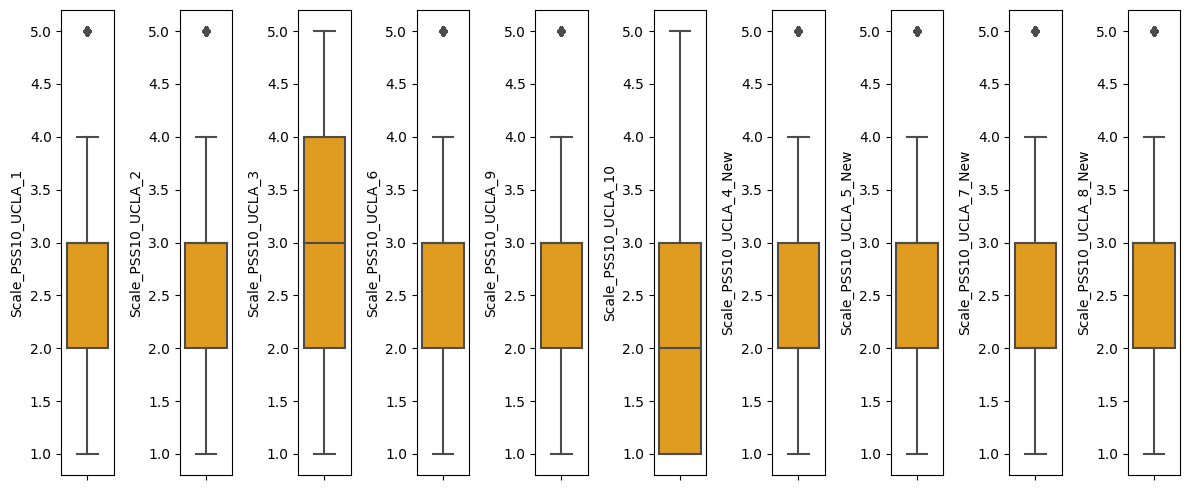

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(scale_pss10_ucla)):
    plt.subplot(1, len(scale_pss10_ucla), i+1)
    sns.boxplot(y=df[scale_pss10_ucla[i]], color='orange', orient='v')
    plt.tight_layout()

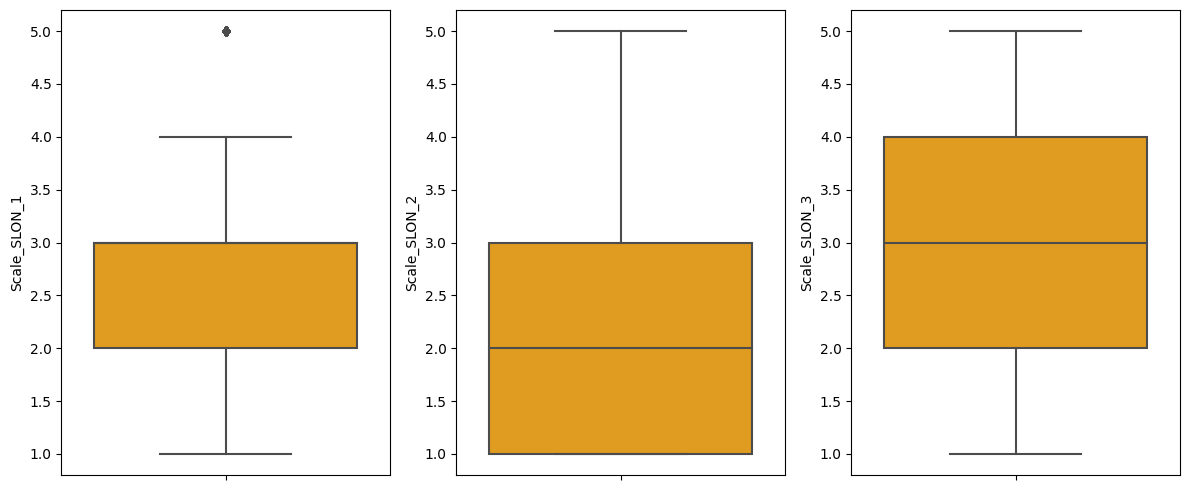

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(scale_slon)):
    plt.subplot(1, len(scale_slon), i+1)
    sns.boxplot(y=df[scale_slon[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(7, 5))
for i in range(0, len(oecd_people)):
    plt.subplot(1, len(oecd_people), i+1)
    sns.boxplot(y=df[oecd_people[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(oecd_institutions)):
    plt.subplot(1, len(oecd_institutions), i+1)
    sns.boxplot(y=df[oecd_institutions[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(corona_concerns)):
    plt.subplot(1, len(corona_concerns), i+1)
    sns.boxplot(y=df[corona_concerns[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(compliance)):
    plt.subplot(1, len(compliance), i+1)
    sns.boxplot(y=df[compliance[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(20, 40))
for i in range(0, len(bff_15)):
    plt.subplot(len(bff_15),8, i+1)
    sns.boxplot(y=df[bff_15[i]], color='orange', orient='v')
    plt.tight_layout()

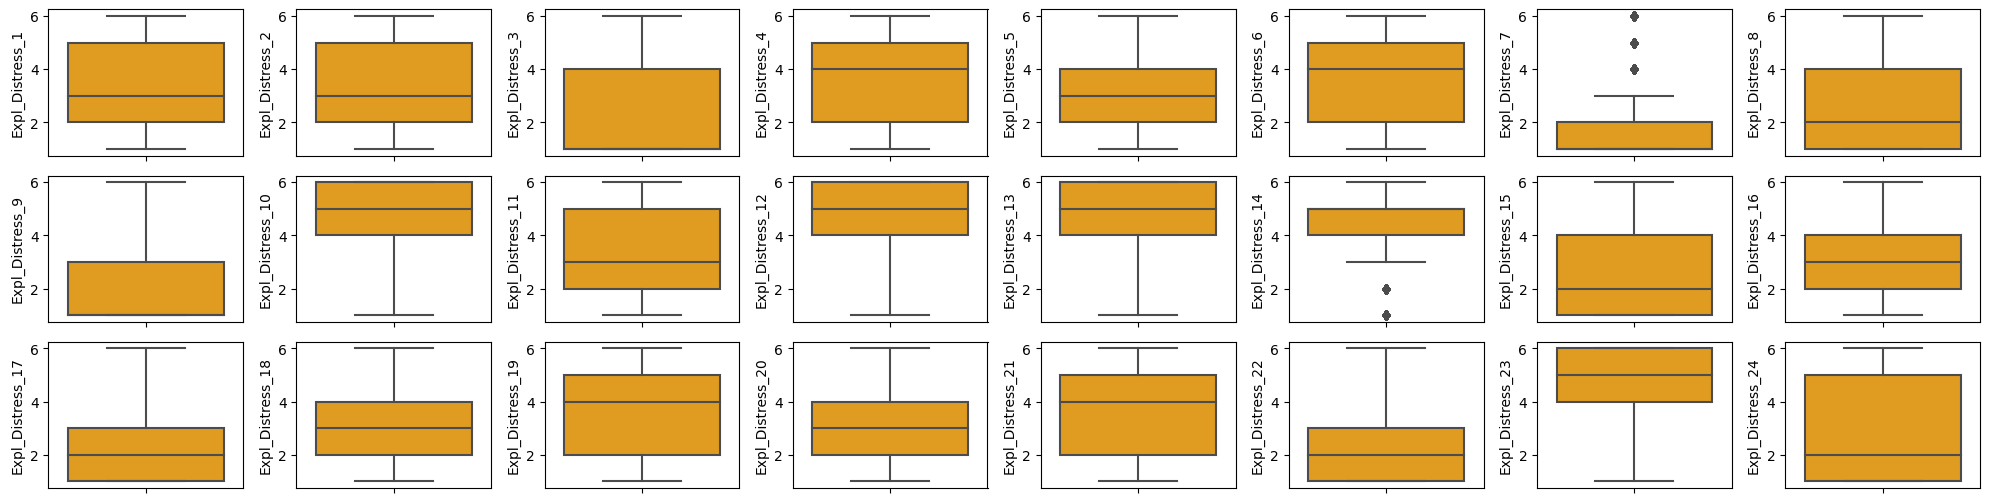

In [ ]:
plt.figure(figsize=(20, 40))
for i in range(0, len(expl_distress)):
    plt.subplot(len(expl_distress),8, i+1)
    sns.boxplot(y=df[expl_distress[i]], color='orange', orient='v')
    plt.tight_layout()
plt.show()

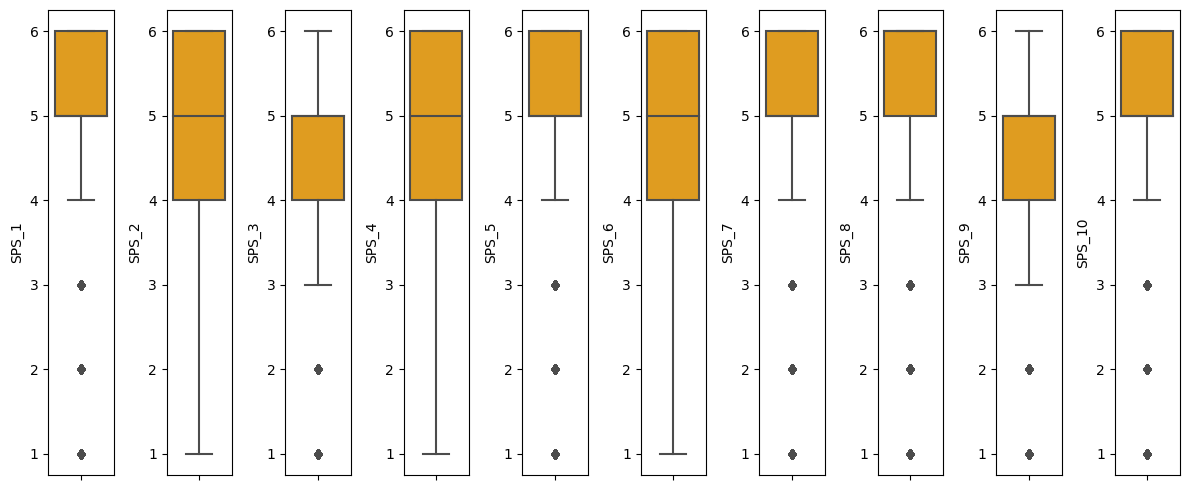

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(sps)):
    plt.subplot(1, len(sps), i+1)
    sns.boxplot(y=df[sps[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 30))
for i in range(0, len(expl_coping)):
    plt.subplot(len(expl_coping),8, i+1)
    sns.boxplot(y=df[expl_coping[i]], color='orange', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(expl_media)):
    plt.subplot(1, len(expl_media), i+1)
    sns.boxplot(y=df[expl_media[i]], color='orange', orient='v')
    plt.tight_layout()